**Date: 02/11/2025**

## **Post-Event Analysis: Average Future Moves After >3% Absolute Daily Change**


Frequency of Daily Changes - Percentage of Days (2011-01-01 to 2025-11-01):

|  Daily Change %  |   VOO % |   QQQ % |   MA % |   MSFT % |
|:----------------:|--------:|--------:|-------:|---------:|
|  More than -5%   |    0.19 |    0.27 |   0.67 |     0.54 |
|    -5% to -3%    |    1.05 |     1.8 |   2.76 |     2.36 |
|    -3% to -1%    |     9.6 |   12.68 |  15.12 |    15.39 |
|    -1% to 1%     |   76.27 |    67.4 |  59.44 |     58.5 |
|     1% to 3%     |   12.14 |   16.41 |  19.09 |    20.32 |
|     3% to 5%     |    0.51 |    1.15 |   2.17 |     2.14 |
|   More than 5%   |    0.24 |    0.29 |   0.75 |     0.75 |


Frequency of Daily Changes - Count/Total Days (2011-01-01 to 2025-11-01):

|  Daily Change %  |    VOO    |    QQQ    |    MA     |   MSFT    |
|:----------------:|:---------:|:---------:|:---------:|:---------:|
|  More than -5%   |  7/3730   |  10/3730  |  25/3730  |  20/3730  |
|    -5% to -3%    |  39/3730  |  67/3730  | 103/3730  |  88/3730  |
|    -3% to -1%    |

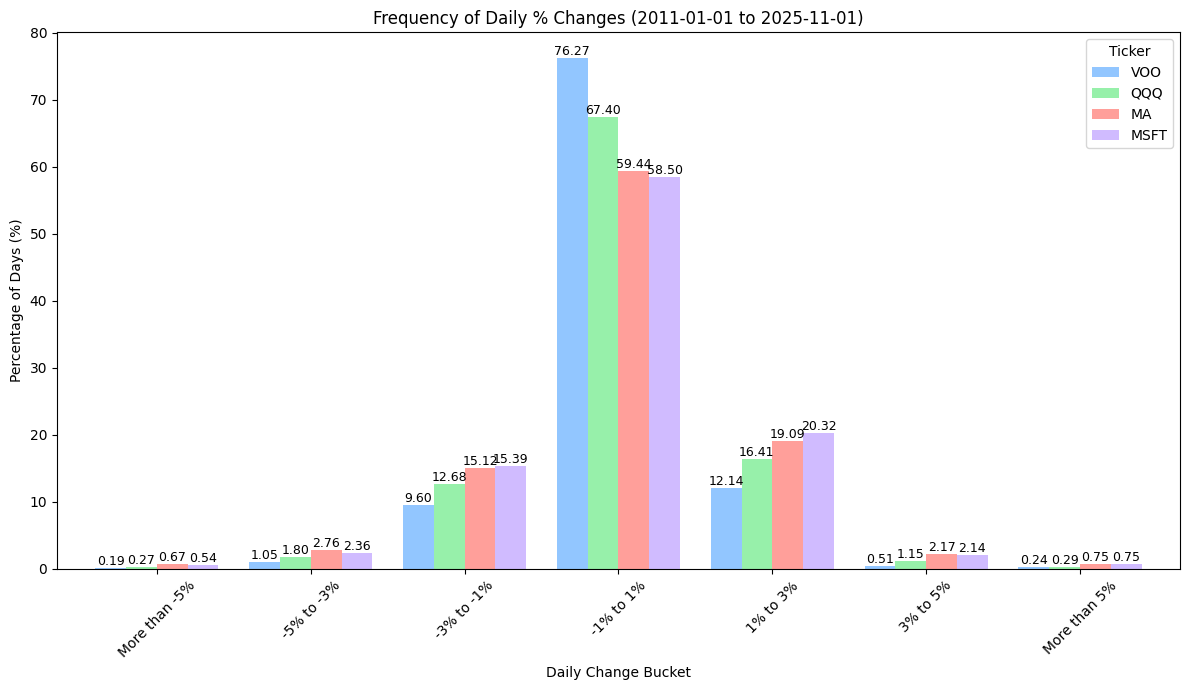

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')
tickers = ['VOO', 'QQQ', 'MA', 'MSFT']
start_date = '2011-01-01'
end_date = '2025-11-01'

data = yf.download(tickers, start=start_date, end=end_date, progress=False)['Close']
daily_change = data.pct_change() * 100
plt.style.use("seaborn-v0_8-pastel")

# Threshold Buckets
thresholds = {
    'More than -5%': lambda x: (x < -5),
    '-5% to -3%': lambda x: (-5 <= x < -3),
    '-3% to -1%': lambda x: (-3 <= x < -1),
    '-1% to 1%': lambda x: (-1 <= x <= 1),
    '1% to 3%': lambda x: (1 < x <= 3),
    '3% to 5%': lambda x: (3 < x <= 5),
    'More than 5%': lambda x: (x > 5)
}

perc_data = {}
count_data = {}
index = list(thresholds.keys())

for ticker in tickers:
    total_days = daily_change[ticker].count()
    perc_col = []
    count_col = []
    for threshold, condition in thresholds.items():
        count = daily_change[ticker].apply(condition).sum()
        perc_col.append(round((count / total_days) * 100, 2))
        count_col.append(f"{count}/{total_days}")

    perc_data[f"{ticker} %"] = perc_col
    count_data[f"{ticker}"] = count_col

frequency_table_perc = pd.DataFrame(perc_data, index=index)
frequency_table_count = pd.DataFrame(count_data, index=index)

frequency_table_perc.index.name = 'Daily Change %'
frequency_table_count.index.name = 'Daily Change %'

print("\nFrequency of Daily Changes - Percentage of Days (2011-01-01 to 2025-11-01):\n")
print(frequency_table_perc.to_markdown(numalign="right", stralign="center"))

print("\n\nFrequency of Daily Changes - Count/Total Days (2011-01-01 to 2025-11-01):\n")
print(frequency_table_count.to_markdown(numalign="right", stralign="center"))
print(f"\n.")

ax = pd.DataFrame({
    t: frequency_table_perc[f"{t} %"] for t in tickers
}, index=frequency_table_perc.index).plot(kind="bar", figsize=(12,7), width=0.8)

plt.title("Frequency of Daily % Changes (2011-01-01 to 2025-11-01)")
plt.ylabel("Percentage of Days (%)")
plt.xlabel("Daily Change Bucket")
plt.xticks(rotation=45)
plt.legend(title="Ticker")

for container in ax.containers:
    ax.bar_label(container, fmt="%.2f", label_type="edge", fontsize=9)

plt.tight_layout()

In [2]:
print("--- TOP 10 LARGEST DAILY CHANGES ---")

for ticker in tickers:
    top_10_pos = daily_change[ticker].nlargest(10).round(2)
    top_10_neg = daily_change[ticker].nsmallest(10).round(2)

    combined_table = pd.DataFrame({
        "Date (↑)": top_10_pos.index.strftime('%Y-%m-%d').values,
        "Change % (↑)": top_10_pos.values,
        "Date (↓)": top_10_neg.index.strftime('%Y-%m-%d').values,
        "Change % (↓)": top_10_neg.values
    })

    print(f"\n======== {ticker} ========")
    print(combined_table.to_markdown(index=False, floatfmt=".2f"))
    print("\n" + "-"*60)


--- TOP 10 LARGEST DAILY CHANGES ---

======== VOO ========
| Date (↑)   |   Change % (↑) | Date (↓)   |   Change % (↓) |
|:-----------|---------------:|:-----------|---------------:|
| 2020-03-24 |           9.54 | 2020-03-16 |         -11.74 |
| 2020-03-13 |           9.34 | 2020-03-12 |          -9.67 |
| 2025-04-09 |           9.27 | 2020-03-09 |          -7.72 |
| 2020-04-06 |           6.80 | 2011-08-08 |          -6.41 |
| 2020-03-17 |           6.55 | 2025-04-04 |          -5.80 |
| 2020-03-26 |           6.01 | 2020-06-11 |          -5.76 |
| 2022-11-10 |           5.47 | 2020-03-18 |          -5.47 |
| 2020-03-10 |           5.13 | 2020-03-11 |          -4.96 |
| 2018-12-26 |           5.06 | 2025-04-03 |          -4.77 |
| 2011-08-09 |           4.48 | 2011-08-04 |          -4.68 |

------------------------------------------------------------

======== QQQ ========
| Date (↑)   |   Change % (↑) | Date (↓)   |   Change % (↓) |
|:-----------|---------------:|:-----------|-----

In [3]:
print("--- POST-EVENT (Sharp Drop/Rise) ANALYSIS RESULTS---")
print(f"Remark: Figures in bracket beside the percentage represent Positive Outcomes over Total Events\n")

horizons = {
    "1 week": 5,
    "2 weeks": 10,
    "1 month": 21,
    "3 months": 63,
    "1 year": 252
}

for ticker in tickers:
    returns = daily_change[ticker]
    pos_events = returns[returns > 3]
    neg_events = returns[returns < -3]

    def avg_future_return(events, horizon):
        results = []
        for date in events.index:
            future_window = data[ticker].loc[date:].iloc[:horizon+1]
            if len(future_window) == horizon + 1:
                start_price = future_window.iloc[0]
                end_price = future_window.iloc[-1]
                calc_return = (end_price / start_price - 1) * 100
                results.append(calc_return)
        if results:
            mean_return = pd.Series(results).mean()
            positive_count = sum(1 for r in results if r > 0)
            total_count = len(results)
            return mean_return, positive_count, total_count
        else:
            return None, 0, 0

    pos_results_tuples = [avg_future_return(pos_events, days) for days in horizons.values()]
    neg_results_tuples = [avg_future_return(neg_events, days) for days in horizons.values()]

    formatted_pos_results = []
    for mean_r, pos_c, total_c in pos_results_tuples:
        if mean_r is not None:
            formatted_pos_results.append(f"{mean_r:.2f}% ({pos_c}/{total_c})")
        else:
            formatted_pos_results.append("No data")

    formatted_neg_results = []
    for mean_r, pos_c, total_c in neg_results_tuples:
        if mean_r is not None:
            formatted_neg_results.append(f"{mean_r:.2f}% ({pos_c}/{total_c})")
        else:
            formatted_neg_results.append("No data")

    combined_analysis_table = pd.DataFrame({
        'Positive Events (↑ 3%)': formatted_pos_results,
        'Negative Events (↓ 3%)': formatted_neg_results
    }, index=horizons.keys())

    print(f"\n======== {ticker} ========")
    print(combined_analysis_table.to_markdown(numalign="right", stralign="center"))
    print("-"*60)

--- POST-EVENT (Sharp Drop/Rise) ANALYSIS RESULTS---
Remark: Figures in bracket beside the percentage represent Positive Outcomes over Total Events


======== VOO ========
|          |  Positive Events (↑ 3%)  |  Negative Events (↓ 3%)  |
|:--------:|:------------------------:|:------------------------:|
|  1 week  |      -2.08% (12/28)      |      0.86% (29/46)       |
| 2 weeks  |      -1.03% (16/28)      |      0.58% (28/46)       |
| 1 month  |      1.55% (17/28)       |      3.26% (33/46)       |
| 3 months |      9.84% (24/28)       |      11.10% (42/46)      |
|  1 year  |      31.45% (25/26)      |      30.19% (43/43)      |
------------------------------------------------------------

======== QQQ ========
|          |  Positive Events (↑ 3%)  |  Negative Events (↓ 3%)  |
|:--------:|:------------------------:|:------------------------:|
|  1 week  |      -1.18% (24/54)      |      0.87% (48/77)       |
| 2 weeks  |      -0.33% (28/54)      |      1.24% (49/77)       |
| 1 mon

**Why I select a 3% threshold and why Mastercard and Microsoft?**
- **3%:** Statistically, the event of single-day 5% drop/rise is too scarce, with at most only 20 counts over 3,730 trading days (~0.5%).
- **Mastercard & Microsoft:** Both not only the long-standing dominant players within their respective industries but also providers of essential products and services (PC operating systems, enterprise software, office suite, and global payment processing network) in the modern era.

**Trading Insights:**
- **The "Fade the Rip" Signal:** When an asset rallies >3% in a single day, it averagely produces negative returns over the following week and only return after a month.
- **The "Buy the Dip" Signal:** When an asset crashes <3% in a single day, it averagely produces positive returns over the following week and month.
- By the 3-month and 1-year marks, the direction of the initial event becomes irrelevant. This confirms that **large daily volatility events are "noise"** in the context of long-term trend following.
- For one week horizon, since the positive outcomes over total events of MSFT's negative event is ~70%, **selling OTM put options** could be a good choice. If the stock rebounds, the puts expire worthless, you earn the premium. If it continues to drop, you might be assigned shares at a price lower than the dip, aligning with a long-term accumulation strategy.

**Shortcomings and Considerations to be acknowledged:**
- **Past Performance Is Not Indicative of Future Results:** These are historical observations over a specific period. Market conditions, economic environments, and company-specific news may significantly alter these patterns.
- **Autocorrelation (Overlapping Windows):** During high volatility periods (like March 2020), we might have a -3% drop on Monday, a -4% drop on Tuesday, and a -6% drop on Wednesday. The script treats these as three separate events. However, their "1-year future windows" overlap by 99.5%. This inflates the significance of the results because the data points are not independent. The "success" of the trade is counting the same market recovery three times.
- **Lack of Dispersion Metrics (Standard Deviation):** If the "Negative Event" 1-week return is 0.86%, but the standard deviation is 5%, the strategy is extremely volatile.

## **Post-Event Analysis: Average Future Moves After RSI(14) Oversold & Overbought**

In [4]:
pip install TA-Lib


Frequency of RSI(14) Levels - Percentage of Days (2011 to Nov 2025):

|     RSI(14) Level     |   VOO % |   QQQ % |   MA % |   MSFT % |
|:---------------------:|--------:|--------:|-------:|---------:|
| < 20 (Extremely Low)  |    0.16 |    0.05 |      0 |        0 |
|         20-25         |     0.3 |    0.27 |   0.46 |     0.05 |
|         25-30         |       1 |    0.89 |   0.56 |     0.89 |
|         70-75         |    6.46 |    8.04 |   5.17 |     6.75 |
|         75-80         |    1.86 |    2.99 |   2.18 |     3.09 |
|         80-85         |    0.59 |    0.73 |   0.59 |     0.59 |
| > 85 (Extremely High) |    0.03 |    0.05 |   0.05 |     0.05 |


Frequency of RSI(14) Levels - Count/Total Days (2011 to Nov 2025):

|     RSI(14) Level     |  VOO Count  |  QQQ Count  |  MA Count  |  MSFT Count  |
|:---------------------:|:-----------:|:-----------:|:----------:|:------------:|
| < 20 (Extremely Low)  |   6/3717    |   2/3717    |   0/3717   |    0/3717    |
|         20-25    

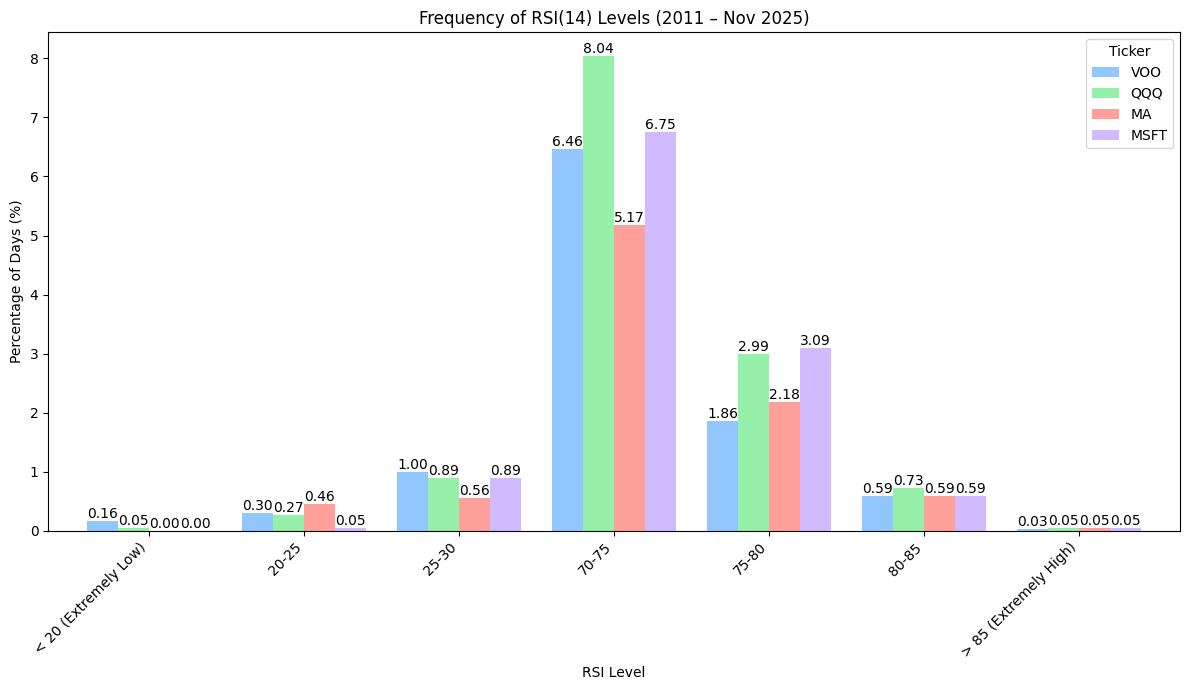

In [5]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import talib
from IPython.display import display

tickers = ['VOO', 'QQQ', 'MA', 'MSFT']
start_date = '2011-01-01'
end_date = '2025-11-01'
plt.style.use("seaborn-v0_8-pastel")

data = yf.download(tickers, start=start_date, end=end_date, progress=False)['Close']
daily_change = data.pct_change() * 100

rsi_data = pd.DataFrame()
for ticker in tickers:
    rsi_data[ticker] = talib.RSI(data[ticker], timeperiod=14)

rsi_thresholds = {
    '< 20 (Extremely Low)': lambda x: (x < 20),
    '20-25': lambda x: (20 <= x < 25),
    '25-30': lambda x: (25 <= x < 30),
    '70-75': lambda x: (70 < x <= 75),
    '75-80': lambda x: (75 < x <= 80),
    '80-85': lambda x: (80 < x <= 85),
    '> 85 (Extremely High)': lambda x: (x > 85)
}

perc_data = {}
count_data = {}
index = list(rsi_thresholds.keys())

for ticker in tickers:
    total_days = rsi_data[ticker].count()
    perc_col = []
    count_col = []
    for threshold, condition in rsi_thresholds.items():
        count = rsi_data[ticker].apply(condition).sum()
        perc_col.append(round((count / total_days) * 100, 2))
        count_col.append(f"{count}/{int(total_days)}")

    perc_data[f"{ticker} %"] = perc_col
    count_data[f"{ticker} Count"] = count_col

frequency_table_perc = pd.DataFrame(perc_data, index=index)
frequency_table_count = pd.DataFrame(count_data, index=index)

frequency_table_perc.index.name = 'RSI(14) Level'
frequency_table_count.index.name = 'RSI(14) Level'

print("\nFrequency of RSI(14) Levels - Percentage of Days (2011 to Nov 2025):\n")
print(frequency_table_perc.to_markdown(numalign="right", stralign="center"))

print("\n\nFrequency of RSI(14) Levels - Count/Total Days (2011 to Nov 2025):\n")
print(frequency_table_count.to_markdown(numalign="right", stralign="center"))
print(f"\n.")

ax = pd.DataFrame({
    t: frequency_table_perc[f"{t} %"] for t in tickers
}, index=frequency_table_perc.index).plot(kind="bar", figsize=(12, 7), width=0.8)

plt.title("Frequency of RSI(14) Levels (2011 – Nov 2025)")
plt.ylabel("Percentage of Days (%)")
plt.xlabel("RSI Level")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Ticker")

for container in ax.containers:
    ax.bar_label(container, fmt="%.2f", label_type="edge", fontsize=10)

plt.tight_layout()
plt.show()

In [6]:
print("\n--- TOP 10 HIGHEST & LOWEST RSI(14) ---")

for ticker in tickers:
    top_10_high = rsi_data[ticker].nlargest(10).round(2)
    top_10_low = rsi_data[ticker].nsmallest(10).round(2)

    combined_table = pd.DataFrame({
        "Date (High)": top_10_high.index.strftime('%Y-%m-%d').values,
        "RSI Level (High)": top_10_high.values,
        "Date (Low)": top_10_low.index.strftime('%Y-%m-%d').values,
        "RSI Level (Low)": top_10_low.values
    })

    print(f"\n======== {ticker} ========")
    print(combined_table.to_markdown(index=False, floatfmt=".2f"))
    print("\n" + "-"*60)



--- TOP 10 HIGHEST & LOWEST RSI(14) ---

======== VOO ========
| Date (High)   |   RSI Level (High) | Date (Low)   |   RSI Level (Low) |
|:--------------|-------------------:|:-------------|------------------:|
| 2018-01-26    |              87.27 | 2011-08-08   |             16.75 |
| 2018-01-23    |              84.67 | 2015-08-25   |             16.99 |
| 2018-01-12    |              84.32 | 2018-10-11   |             18.06 |
| 2018-01-22    |              84.02 | 2015-08-24   |             18.41 |
| 2018-01-25    |              84.01 | 2018-12-24   |             19.20 |
| 2018-01-24    |              83.86 | 2020-02-28   |             19.56 |
| 2017-03-01    |              82.68 | 2020-02-27   |             20.29 |
| 2020-09-02    |              82.47 | 2025-04-08   |             21.51 |
| 2017-02-27    |              82.08 | 2018-12-21   |             22.50 |
| 2018-01-11    |              81.98 | 2025-04-07   |             23.07 |

-----------------------------------------------

In [7]:
print("--- POST-EVENT (RSI) ANALYSIS RESULTS ---")
print(f"Remark: Figures in bracket beside the percentage represent Positive Outcomes over Total Events with sample size >20.")

horizons = {
    "1 week": 5,
    "2 weeks": 10,
    "1 month": 21,
    "3 months": 63,
    "1 year": 252
}

for ticker in tickers:
    oversold_lt20 = rsi_data[ticker][rsi_data[ticker] < 20]
    oversold_20_25 = rsi_data[ticker][(rsi_data[ticker] >= 20) & (rsi_data[ticker] < 25)]
    oversold_25_30 = rsi_data[ticker][(rsi_data[ticker] >= 25) & (rsi_data[ticker] < 30)]
    overbought_75_80 = rsi_data[ticker][(rsi_data[ticker] > 75) & (rsi_data[ticker] <= 80)]
    overbought_80_85 = rsi_data[ticker][(rsi_data[ticker] > 80) & (rsi_data[ticker] <= 85)]
    overbought_gt85 = rsi_data[ticker][rsi_data[ticker] > 85]

    def avg_future_return(events, horizon):
        results = []
        for date in events.index:
            try:
                date_loc = data.index.get_loc(date)
                if date_loc + horizon < len(data):
                    start_price = data[ticker].iloc[date_loc]
                    end_price = data[ticker].iloc[date_loc + horizon]
                    if pd.notna(start_price) and pd.notna(end_price) and start_price != 0:
                        results.append((end_price / start_price - 1) * 100)
            except KeyError:
                continue
        if results:
            mean_return = pd.Series(results).mean()
            positive_count = sum(1 for r in results if r > 0)
            total_count = len(results)
            return mean_return, positive_count, total_count
        else:
            return None, 0, 0

    results_dict_formatted = {
        'RSI <20': [],
        'RSI 20-25': [],
        'RSI 25-30': [],
        'RSI 75-80': [],
        'RSI 80-85': [],
        'RSI >85': []
    }

    event_categories = {
        'RSI <20': oversold_lt20,
        'RSI 20-25': oversold_20_25,
        'RSI 25-30': oversold_25_30,
        'RSI 75-80': overbought_75_80,
        'RSI 80-85': overbought_80_85,
        'RSI >85': overbought_gt85
    }

    for days_label, days in horizons.items():
        for rsi_col, events_series in event_categories.items():
            mean_r, pos_c, total_c = avg_future_return(events_series, days)
            if mean_r is not None:
                if total_c > 20:
                    results_dict_formatted[rsi_col].append(f"{mean_r:.2f}% ({pos_c}/{total_c})")
                else:
                    results_dict_formatted[rsi_col].append(f"{mean_r:.2f}%")
            else:
                results_dict_formatted[rsi_col].append("NaN")

    analysis_table = pd.DataFrame(results_dict_formatted, index=horizons.keys())

    event_counts = pd.DataFrame({
        'RSI <20': [f"n={len(oversold_lt20)}"],
        'RSI 20-25': [f"n={len(oversold_20_25)}"],
        'RSI 25-30': [f"n={len(oversold_25_30)}"],
        'RSI 75-80': [f"n={len(overbought_75_80)}"],
        'RSI 80-85': [f"n={len(overbought_80_85)}"],
        'RSI >85': [f"n={len(overbought_gt85)}"]
    }, index=['Total Count'])

    print(f"\n\n======== {ticker} ========")
    print(event_counts.to_markdown(numalign="center", stralign="center"))
    print()
    print(analysis_table.to_markdown(numalign="right", stralign="center"))
    print("-" * 60)

summary_counts = pd.DataFrame({
    ticker: [
        len(rsi_data[ticker][rsi_data[ticker] < 20]),
        len(rsi_data[ticker][(rsi_data[ticker] >= 20) & (rsi_data[ticker] < 25)]),
        len(rsi_data[ticker][(rsi_data[ticker] >= 25) & (rsi_data[ticker] < 30)]),
        len(rsi_data[ticker][(rsi_data[ticker] > 75) & (rsi_data[ticker] <= 80)]),
        len(rsi_data[ticker][(rsi_data[ticker] > 80) & (rsi_data[ticker] <= 85)]),
        len(rsi_data[ticker][rsi_data[ticker] > 85])
    ] for ticker in tickers
}, index=['RSI <20', 'RSI 20-25', 'RSI 25-30',
          'RSI 75-80', 'RSI 80-85', 'RSI >85'])

--- POST-EVENT (RSI) ANALYSIS RESULTS ---
Remark: Figures in bracket beside the percentage represent Positive Outcomes over Total Events with sample size >20.


======== VOO ========
|             |  RSI <20  |  RSI 20-25  |  RSI 25-30  |  RSI 75-80  |  RSI 80-85  |  RSI >85  |
|:-----------:|:---------:|:-----------:|:-----------:|:-----------:|:-----------:|:---------:|
| Total Count |    n=6    |    n=11     |    n=37     |    n=69     |    n=22     |    n=1    |

|          |  RSI <20  |  RSI 20-25  |   RSI 25-30    |   RSI 75-80    |   RSI 80-85    |  RSI >85  |
|:--------:|:---------:|:-----------:|:--------------:|:--------------:|:--------------:|:---------:|
|  1 week  |   3.83%   |    2.73%    | 1.60% (31/37)  | -0.13% (39/69) | 0.24% (14/22)  |  -3.86%   |
| 2 weeks  |   1.58%   |   -0.28%    | 1.45% (27/37)  | 0.02% (47/69)  | -0.93% (13/22) |  -8.70%   |
| 1 month  |   3.00%   |    2.93%    | 2.37% (25/37)  | 0.06% (46/69)  | -2.26% (3/22)  |  -4.26%   |
| 3 months |   9.0

**Trading Insights:**
- For VOO & QQQ, when the 14-day RSI drops into the 25-30 interval, there's a historically **high probability of a rebound in the short term**. Given the high probability of positive returns, a potential strategy could be to **sell OTM put options** expiring in the next week or two. If the price rebounds as historically observed, the options would expire worthless, allowing you to collect the premium. However, if the price continues to drop, you might be assigned shares, which aligns with a long-term accumulation strategy on a dip.
- For VOO, a significant discovery emerges when its 14-day RSI moves into the 80-85 interval. Historically, this has often been followed by a **negative short-to-medium term performance**. Due to the very low probability of positive returns and a significant negative average return over the next month, a potential strategy could be to **buy put options** targeting the one-month horizon. This aims to profit from the anticipated pullback.

**Caveats remain the same as above.**

**Further Computations:**

- Outcomes Following Three/Four/Five-day Consecutive Drops
- Outcomes Following One week/month Cumulatively 10% Drops